### tensorflow로 Face Detection 수행하기
* WiderFace 데이터세트로 Pretrained된 Tensorflow graph 모델을 다운로드 받아 이를 이용해 Face Detection 수행. 

### 본 실습 예제는 GPU를 활용하므로 상단 메뉴에서 런타임->런타임 유형 변경에서 GPU를 선택해 주십시요. 


#### tensorflow, keras 설치 및 강의 실습코드/데이터 Download

**공지**

현재(2020년 8월 11일) Colab에서 GPU 커널 적용시 tensorflow 1.13으로 downgrade가 되지 않습니다. 
때문에 colab에서는 Segmentation 학습 시 tensorflow 1.15, keras 2.3 을 설치하겠습니다. 

Colab 버전colab에서 pip 명령어를 이용하여 tensorflow 1.15, keras 2.3를 소스코드 커널 기동시 마다 설치해야 합니다

Colab의 tensorflow는 2020년 기준으로 2.2 이며, keras는 2.3입니다. 실습코드는 tensorflow 1.13과 1.15, keras 2.2와 2.3 기준으로 되어 있으므로 이를 downgrade해야 합니다.

pip를 이용하여 tensorflow 1.15을 설치하면 자동으로 downgrade 됩니다.

OpenCV는 Colab에서 이미 설치 되어 있으니 추가설치는 필요 없습니다.

강의 실습코드와 데이터는 https://github.com/chulminkw/DLCV.git 에서 다운로드 할 수 있습니다. 

In [1]:
# 현재 디렉토리는 /content이며 이 디렉토리를 기준으로 실습코드와 데이터를 다운로드 합니다. 
!pwd
!rm -rf DLCV
!git clone https://github.com/chulminkw/DLCV.git
# DLCV 디렉토리가 Download되고 DLCV 밑에 Detection과 Segmentation 디렉토리가 있는 것을 확인
!ls -lia 
!ls -lia DLCV

/content
Cloning into 'DLCV'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (71/71), done.
Receiving objects: 100% (234/234), 142.72 MiB | 33.17 MiB/s, done.
remote: Total 234 (delta 32), reused 0 (delta 0), pack-reused 159
Resolving deltas: 100% (89/89), done.
total 20
2101102 drwxr-xr-x 1 root root 4096 Apr  5 08:40 .
3170899 drwxr-xr-x 1 root root 4096 Apr  5 08:04 ..
2622184 drwxr-xr-x 4 root root 4096 Mar 25 13:38 .config
2119239 drwxr-xr-x 7 root root 4096 Apr  5 08:40 DLCV
2101103 drwxr-xr-x 1 root root 4096 Mar 25 13:38 sample_data
total 11016
2119239 drwxr-xr-x 7 root root    4096 Apr  5 08:40  .
2101102 drwxr-xr-x 1 root root    4096 Apr  5 08:40  ..
3170952 drwxr-xr-x 2 root root    4096 Apr  5 08:40  colab_tf115_modify_files
3170955 drwxr-xr-x 6 root root    4096 Apr  5 08:40  data
3170908 drwxr-xr-x 8 root root    4096 Apr  5 08:40  Detection
2119260 -rw-r--r-- 1 root root 6567662 Apr  5 08:40  DLCV

In [2]:
#현재(2020년 8월 11일) Colab에서 GPU 커널 적용시 tensorflow 1.13으로 downgrade가 되지 않습니다. 
#때문에 colab에서는 Segmentation 학습 시 tensorflow 1.15, keras 2.3 을 설치하겠습니다.
# tensorflow 1.15을 설치합니다. 자동으로 tensorflow 2.2가 1.15로 downgrade 됩니다. 
!pip install tensorflow-gpu==1.15.2 
# keras 2.3를 설치합니다. 
!pip install keras==2.3.0

In [3]:
# tensorflow 1.15과 keras 2.3 version 확인.  
import tensorflow as tf
import keras

print(tf.__version__)
print(keras.__version__)

1.15.2
2.3.0


Using TensorFlow backend.


#### Tensorflow Face Detector
* Github : https://github.com/yeephycho/tensorflow-face-detection
* SSD + MobileNet기반으로 Pretrained된 모델 다운로드 
* https://github.com/yeephycho/tensorflow-face-detection/raw/master/model/frozen_inference_graph_face.pb

In [4]:
### 코랩 버전은 아래를 이용하여 다시 pretrained 모델을 다운로드 받아야 합니다.

In [5]:
!rm -rf /content/DLCV/Detection/ssd//pretrained
!mkdir /content/DLCV/Detection/ssd/pretrained
# pretrained 디렉토리가 생성되었는지 확인 합니다. 
%cd /content/DLCV/Detection/ssd
!ls

### coco 데이터 세트로 pretrained 된 ssd 파일과 config용 graph pbtxt 다운로드 
%cd /content/DLCV/Detection/ssd/pretrained
!echo "##### downloading pretrained ssd face weight file"
!wget https://github.com/yeephycho/tensorflow-face-detection/raw/master/model/frozen_inference_graph_face.pb

!echo "##### check out pretrained ssd face weight file"
!ls /content/DLCV/Detection/ssd/pretrained

/content/DLCV/Detection/ssd
OpenCV_SSD_이미지와_영상_Detection.ipynb
pretrained
SSD_Face_Detection.ipynb
Tensorflow_SSD_이미지와_영상_Detection.ipynb
/content/DLCV/Detection/ssd/pretrained
##### downloading pretrained ssd face weight file
--2021-04-05 08:43:28--  https://github.com/yeephycho/tensorflow-face-detection/raw/master/model/frozen_inference_graph_face.pb
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yeephycho/tensorflow-face-detection/master/model/frozen_inference_graph_face.pb [following]
--2021-04-05 08:43:28--  https://raw.githubusercontent.com/yeephycho/tensorflow-face-detection/master/model/frozen_inference_graph_face.pb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.19

#### SSD + Mobilenet Pretrained된 모델 로딩하여 Face  Detection

Instructions for updating:
Use tf.gfile.GFile.
face: 0.9964
face: 0.9951
face: 0.9914
face: 0.9911
face: 0.9904
face: 0.9882
face: 0.9877
face: 0.9761
face: 0.9755
face: 0.9740
face: 0.9667
face: 0.9640
face: 0.9592
face: 0.9587
face: 0.9544
face: 0.9442
face: 0.9213
face: 0.9006
face: 0.8964
face: 0.8853
face: 0.8644
face: 0.8461
face: 0.8405
face: 0.8310
face: 0.8242
face: 0.8194
face: 0.7923
face: 0.7840
face: 0.7827
face: 0.7746
face: 0.7604
face: 0.7434
face: 0.7191
face: 0.7108
face: 0.6926
face: 0.6902
face: 0.6755
face: 0.6551
face: 0.6531
face: 0.6243
face: 0.6139
face: 0.6107
face: 0.5777
face: 0.5726
face: 0.5613
face: 0.5372
face: 0.4968
face: 0.4912
face: 0.4825
face: 0.4727
face: 0.4677
face: 0.4638
face: 0.4384
face: 0.4296
face: 0.4189
face: 0.4108
face: 0.4002
Detection 수행시간: 7.98 초


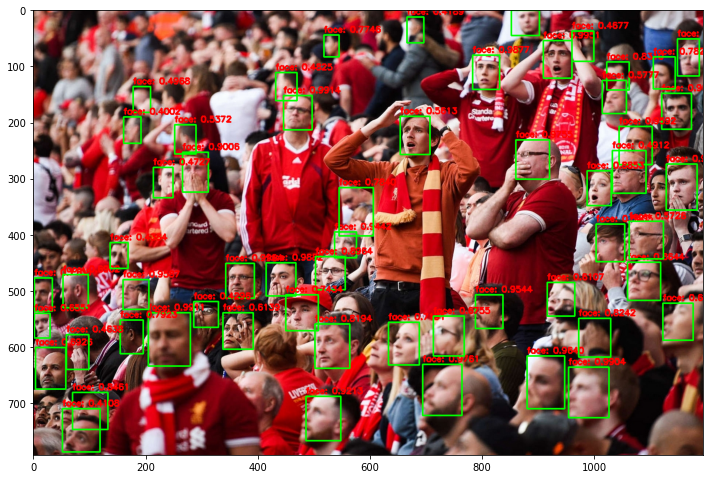

In [6]:
import numpy as np
import tensorflow as tf
import cv2
import time
import matplotlib.pyplot as plt
import os
%matplotlib inline

#코랩 버전은 default_dir과 default_rcnn_dir 절대 경로를 이용합니다. os.path.join()으로 상세 파일/디렉토리를 지정합니다. 
default_dir = '/content/DLCV'
default_ssd_dir='/content/DLCV/Detection/ssd'

#inference graph를 읽음. .
with tf.gfile.FastGFile(os.path.join(default_ssd_dir, 'pretrained/frozen_inference_graph_face.pb'), 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    
with tf.Session() as sess:
    # Session 시작하고 inference graph 모델 로딩 
    sess.graph.as_default()
    tf.import_graph_def(graph_def, name='')
    
    # 입력 이미지 생성 및 BGR을 RGB로 변경 
    img = cv2.imread(os.path.join(default_dir, 'data/image/EPL01.jpg'))
    draw_img = img.copy()
    rows = img.shape[0]  
    cols = img.shape[1]
    inp = cv2.resize(img, (300, 300)) # ssd는 입력 이미지 사이즈를 (300, 300)으로 맞춰주어야 한다.
    # OpenCV로 입력받은 BGR 이미지를 RGB 이미지로 변환 
    inp = inp[:, :, [2, 1, 0]]  #OpenCV의 blobFromImage는 swapRB가 있는데 tensorflow는 없기 때문에 RGB를 수동으로 바꿔주어야 한다.

    start = time.time()
    # Object Detection 수행. 
    out = sess.run([sess.graph.get_tensor_by_name('num_detections:0'),
                    sess.graph.get_tensor_by_name('detection_scores:0'),
                    sess.graph.get_tensor_by_name('detection_boxes:0'),
                    sess.graph.get_tensor_by_name('detection_classes:0')],
                   feed_dict={'image_tensor:0': inp.reshape(1, inp.shape[0], inp.shape[1], 3)}) # 여러개의 Image를 detect해야 할 수도 있기때문에 4차원 형식
    
    green_color=(0, 255, 0)
    red_color=(0, 0, 255)
    
    # Bounding Box 시각화 
    # Detect된 Object 별로 bounding box 시각화 
    num_detections = int(out[0][0])
    for i in range(num_detections):
        # class id와 object class score, bounding box정보를 추출
        classId = int(out[3][0][i])
        score = float(out[1][0][i])
        bbox = [float(v) for v in out[2][0][i]]
        if score > 0.4:
            left = bbox[1] * cols # 네트웤에 반환된 좌표값은 네트웤에 들어오는 reside된 값을 0~1로 정규화된 값이다. 원본 이미지에 맞추려면 가로, 세로 값을 곱해줘야 한다.
            top = bbox[0] * rows
            right = bbox[3] * cols
            bottom = bbox[2] * rows
            # cv2의 rectangle(), putText()로 bounding box의 클래스명 시각화 
            cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), green_color, thickness=2)
            caption = "face: {:.4f}".format(score)
            print(caption)
            cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, red_color, 2)
    
    print('Detection 수행시간:',round(time.time() - start, 2),"초")
    
img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)
        

Detection 수행시간: 0.841 초


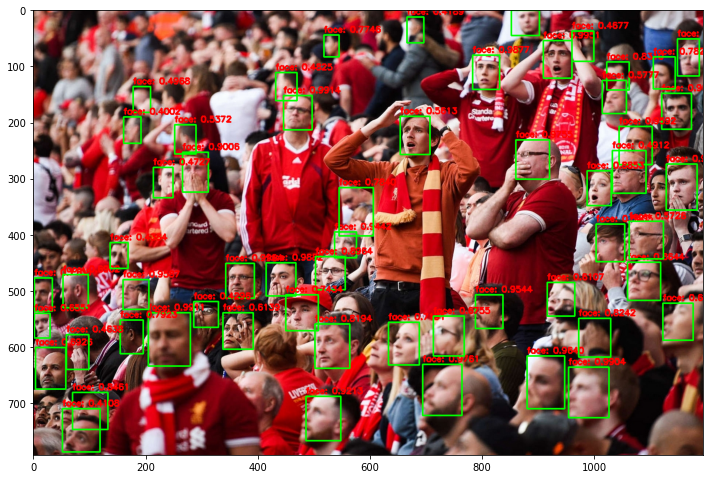

In [ ]:
def get_tensor_detected_image(sess, img_array, use_copied_array):
    
    rows = img_array.shape[0]
    cols = img_array.shape[1]
    if use_copied_array:
        draw_img = img_array.copy()
    else:
        draw_img = img_array
    
    inp = cv2.resize(img_array, (300, 300))
    inp = inp[:, :, [2, 1, 0]]  # BGR2RGB
    
    start = time.time()
    # Object Detection 수행. 
    out = sess.run([sess.graph.get_tensor_by_name('num_detections:0'),
                    sess.graph.get_tensor_by_name('detection_scores:0'),
                    sess.graph.get_tensor_by_name('detection_boxes:0'),
                    sess.graph.get_tensor_by_name('detection_classes:0')],
                   feed_dict={'image_tensor:0': inp.reshape(1, inp.shape[0], inp.shape[1], 3)})
    
    green_color=(0, 255, 0)
    red_color=(0, 0, 255)
    
    # Bounding Box 시각화 
    # Detect된 Object 별로 bounding box 시각화 
    num_detections = int(out[0][0])
    for i in range(num_detections):
        # class id와 object class score, bounding box정보를 추출
        classId = int(out[3][0][i])
        score = float(out[1][0][i])
        bbox = [float(v) for v in out[2][0][i]]
        if score > 0.4:
            left = bbox[1] * cols
            top = bbox[0] * rows
            right = bbox[3] * cols
            bottom = bbox[2] * rows
            # cv2의 rectangle(), putText()로 bounding box의 클래스명 시각화 
            cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), green_color, thickness=2)
            caption = "face: {:.4f}".format(score)
            cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, red_color, 2)
    
    print('Detection 수행시간:',round(time.time() - start, 3),"초")
    return draw_img

#코랩 버전은 default_dir과 default_rcnn_dir 절대 경로를 이용합니다. os.path.join()으로 상세 파일/디렉토리를 지정합니다. 
default_dir = '/content/DLCV'
default_ssd_dir='/content/DLCV/Detection/ssd'

#inference graph를 읽음. .
with tf.gfile.FastGFile(os.path.join(default_ssd_dir, 'pretrained/frozen_inference_graph_face.pb'), 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    
with tf.Session() as sess:
    # Session 시작하고 inference graph 모델 로딩 
    sess.graph.as_default()
    tf.import_graph_def(graph_def, name='')
    
    # 입력 이미지 생성, Object Detection된 image 반환, 반환된 image의 BGR을 RGB로 변경 
    img = cv2.imread(os.path.join(default_dir, 'data/image/EPL01.jpg'))
    draw_img = get_tensor_detected_image(sess, img, True)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

#### tensorflow로 SSD+ Inception 기반 video Object Detection 수행

In [7]:
# 코랩 버전은 아래 코드를 이용합니다.
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/DLCV/data/video/InfiniteWar01.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=800 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
default_dir = '/content/DLCV'
default_ssd_dir='/content/DLCV/Detection/ssd'


video_input_path = os.path.join(default_dir, 'data/video/InfiniteWar01.mp4')
# linux에서 video output의 확장자는 반드시 avi 로 설정 필요. 
video_output_path = os.path.join(default_dir, 'data/output/InfiniteWar01_ssd.avi')

cap = cv2.VideoCapture(video_input_path)

codec = cv2.VideoWriter_fourcc(*'XVID')

vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
vid_fps = cap.get(cv2.CAP_PROP_FPS)
    
vid_writer = cv2.VideoWriter(video_output_path, codec, vid_fps, vid_size) 

frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('총 Frame 갯수:', frame_cnt, 'FPS:', vid_fps )

green_color=(0, 255, 0)
red_color=(0, 0, 255)

# SSD+Inception inference graph를 읽음. .
with tf.gfile.FastGFile(os.path.join(default_ssd_dir, 'pretrained/frozen_inference_graph_face.pb'), 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    
with tf.Session() as sess:
    # Session 시작하고 inference graph 모델 로딩 
    sess.graph.as_default()
    tf.import_graph_def(graph_def, name='')
    index = 0
    while True:
        hasFrame, img_frame = cap.read()
        if not hasFrame:
            print('더 이상 처리할 frame이 없습니다.')
            break

        draw_img_frame = get_tensor_detected_image(sess, img_frame, False)
        vid_writer.write(draw_img_frame)
    # end of while loop

vid_writer.release()
cap.release()  


In [ ]:
## colab 버전은 Object Detection 적용된 영상 파일을 google drive에서 download 해야 합니다. 이를 위해 google drive를 colab에 mount 수행. 
import os, sys 
from google.colab import drive 

drive.mount('/content/gdrive')

In [ ]:
## colab 버전은 Object Detection 적용된 영상 파일을 google drive에서 download 해야 합니다. 
## My Drive 디렉토리 이름에 공란이 있으므로 ' '로 묶습니다. 
!cp /content/DLCV/data/output/InfiniteWar01_ssd.avi '/content/gdrive/My Drive/InfiniteWar01_ssd.avi'
